In [7]:
import numpy as np
from lampe.data import H5Dataset
from pathlib import Path
import os
import torch
import matplotlib.pyplot as plt

import sys
sys.path.insert(0, '/home/mvasist/Highres/')
from DataProcuring import Data


os.environ['SCRATCH'] = os.path.join('/scratch/users/mvasist/')
scratch = os.environ.get('SCRATCH', '')
# scratch = '/users/ricolandman/Research_data/npe_crires/'
datapath = Path(scratch) / 'highres-sbi/data_fulltheta'
datapath_old = Path(scratch) / 'highres-sbi/data'



In [20]:
trainset = H5Dataset(datapath / 'train.h5')
m = []

In [3]:
for theta, x in trainset:
    # print(x.size())
    m.append(x[0].mean())

# np.savetxt('spectral_mean.csv', m)

In [3]:
m = np.loadtxt('spectral_mean.csv')

In [4]:
np.shape(m)

(835584,)

(array([7.9533e+05, 1.3349e+04, 7.6110e+03, 5.7550e+03, 3.8390e+03,
        2.8300e+03, 1.9450e+03, 1.4280e+03, 1.0280e+03, 8.3300e+02,
        5.7200e+02, 3.9900e+02, 2.5600e+02, 1.8300e+02, 1.0200e+02,
        6.5000e+01, 3.9000e+01, 1.0000e+01, 5.0000e+00, 5.0000e+00]),
 array([1.04206144e-10, 1.60889783e+02, 3.21779565e+02, 4.82669348e+02,
        6.43559131e+02, 8.04448914e+02, 9.65338696e+02, 1.12622848e+03,
        1.28711826e+03, 1.44800804e+03, 1.60889783e+03, 1.76978761e+03,
        1.93067739e+03, 2.09156718e+03, 2.25245696e+03, 2.41334674e+03,
        2.57423652e+03, 2.73512631e+03, 2.89601609e+03, 3.05690587e+03,
        3.21779565e+03]),
 <BarContainer object of 20 artists>)

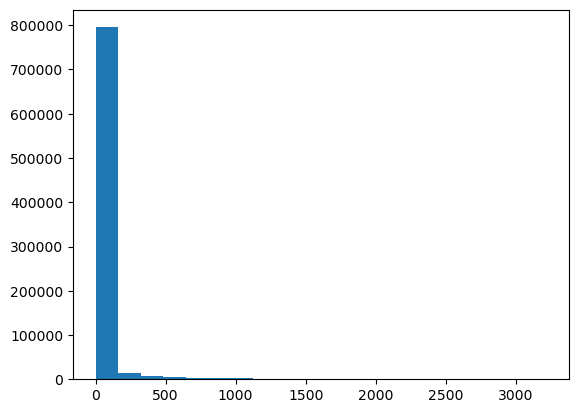

In [17]:
plt.hist(m, bins=20)


In [ ]:
plt.vlines(1.60889783e+02, 0, 850000, color='black')

In [22]:
trainset_old = H5Dataset(datapath_old / 'train.h5')
m_old = []

In [23]:
for theta, x in trainset_old:
    # print(x.size())
    m_old.append(x[0].mean())

In [27]:
np.shape(m_old)

(835584,)

In [2]:
# np.savetxt('spectral_mean_old.csv', m_old)
m_old = np.loadtxt('spectral_mean_old.csv')

(array([7.7116e+05, 2.4104e+04, 4.3880e+03, 4.5880e+03, 5.3280e+03,
        3.9800e+03, 3.8760e+03, 3.3680e+03, 1.6320e+03, 2.8800e+03,
        2.0440e+03, 1.9360e+03, 1.7320e+03, 1.1160e+03, 1.6200e+03,
        6.0800e+02, 8.1600e+02, 3.0800e+02, 0.0000e+00, 1.0000e+02]),
 array([5.69278109e-10, 1.78512800e+02, 3.57025600e+02, 5.35538400e+02,
        7.14051200e+02, 8.92564000e+02, 1.07107680e+03, 1.24958960e+03,
        1.42810240e+03, 1.60661520e+03, 1.78512800e+03, 1.96364080e+03,
        2.14215360e+03, 2.32066640e+03, 2.49917920e+03, 2.67769200e+03,
        2.85620480e+03, 3.03471760e+03, 3.21323040e+03, 3.39174320e+03,
        3.57025600e+03]),
 <BarContainer object of 20 artists>)

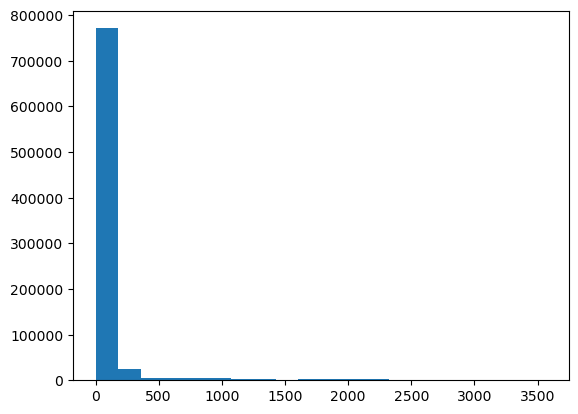

In [5]:
plt.hist(m_old/1e4, bins=20)


In [8]:
d = Data()
plt.plot(d.data_wavelengths_norm, d.flux)

FileNotFoundError: data_to_fit.dat not found.

In [ ]:
'''
To DO

- check the fluxes once again, scaling seems to be the issue
- try MHA and causal conv 

'''